In [37]:
from pydataset import data # importing librabries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import env

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# connect to the mysql server
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [23]:
def wrangle_zillow():
    # Get local cached file if it's there
    filename = "zillow.csv" 

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql(
        ''' 
        SELECT

        bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips

        FROM 

        properties_2017 

        JOIN 
        
        propertylandusetype using (propertyusetypeid)

        WHERE
         
        propertylandusedesc = "Single Family Residential"

        '''
        
        , get_connection('zillow')
        )

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  

In [25]:
df = wrangle_zillow()

In [26]:
df.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0


In [31]:
df.shape #looking at initial data size

(2985217, 8)

In [28]:
df.info() #looking for dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), int64(1)
memory usage: 182.2 MB


In [30]:
df.isnull().sum() # looking at how many nulls per column

Unnamed: 0                          0
bedroomcnt                       2945
bathroomcnt                      2957
calculatedfinishedsquarefeet    45097
taxvaluedollarcnt               34266
yearbuilt                       47833
taxamount                       22752
fips                             2932
dtype: int64

In [32]:
df = df.dropna() #dropping all the na values

In [33]:
df.shape #The nulls are an insignificant amount in the dataset, so I'm going to keep them dropped.

(2901918, 8)

In [35]:
df.drop(columns=['Unnamed: 0'], inplace=True) #dropping unnamed

In [36]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0
5,0.0,0.0,2400.0,287634.0,1943.0,3661.28,6037.0
7,0.0,0.0,3611.0,698984.0,1946.0,7857.84,6037.0


In [61]:
df.columns.tolist()

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

In [62]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------")

bedroomcnt
3.0     1170717
4.0      730024
2.0      604965
5.0      182200
1.0       86501
6.0       48534
0.0       45547
8.0       13283
7.0       12656
9.0        4218
10.0       1670
12.0        941
11.0        415
13.0         83
14.0         64
16.0         47
15.0         23
17.0         11
18.0          9
20.0          6
25.0          1
23.0          1
19.0          1
21.0          1
Name: bedroomcnt, dtype: int64
-----------------
bathroomcnt
2.00     1217537
3.00      631906
1.00      497185
2.50      208514
4.00      133100
1.50       45667
0.00       40405
5.00       38362
3.50       31769
4.50       19832
6.00       16319
5.50        6259
7.00        6186
8.00        4498
6.50        1349
9.00        1326
10.00        489
7.50         383
12.00        264
11.00        198
8.50         111
13.00         53
9.50          50
14.00         39
16.00         23
15.00         20
0.50          16
10.50         14
18.00         12
17.00          8
20.00          7
1.75           4


bedroomcnt


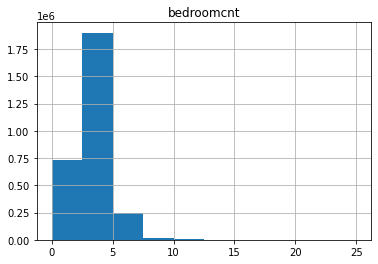

bathroomcnt


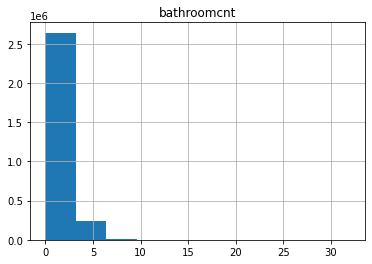

calculatedfinishedsquarefeet


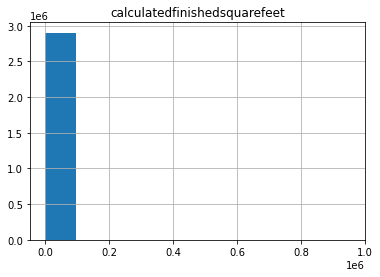

taxvaluedollarcnt


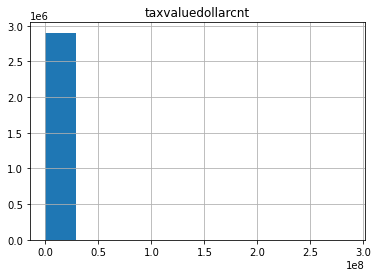

yearbuilt


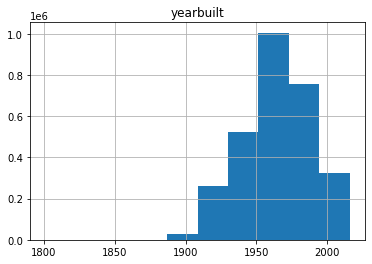

taxamount


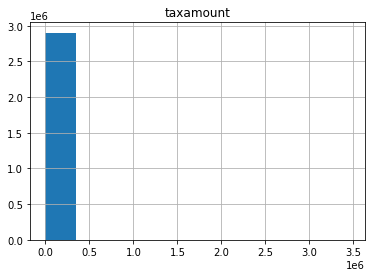

fips


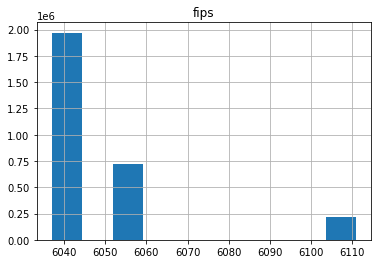

In [63]:
for col in df.columns:
    print(col)
    plt.title(col)
    df[col].hist()
    plt.show()


In [64]:
# A football field is 57,600 square feet
df.calculatedfinishedsquarefeet.sort_values(ascending=False).head(10)

1176033    952576.0
148779     820242.0
462377     617114.0
2338929    531118.0
1938915    522511.0
342941     520825.0
432636     512019.0
1163194    474155.0
1252741    472363.0
1133400    454102.0
Name: calculatedfinishedsquarefeet, dtype: float64

In [65]:
df[df.calculatedfinishedsquarefeet >= 25_000].taxvaluedollarcnt.mean()

13588689.03271028

In [66]:
# Most Zillow customers share more in common with you and me than a movie star with 25 bedrooms.
df.bedroomcnt.value_counts()

3.0     1170717
4.0      730024
2.0      604965
5.0      182200
1.0       86501
6.0       48534
0.0       45547
8.0       13283
7.0       12656
9.0        4218
10.0       1670
12.0        941
11.0        415
13.0         83
14.0         64
16.0         47
15.0         23
17.0         11
18.0          9
20.0          6
25.0          1
23.0          1
19.0          1
21.0          1
Name: bedroomcnt, dtype: int64

In [67]:
df.bathroomcnt.sort_values(ascending=False).head(30)

2296330    32.0
2952363    31.0
1627497    20.0
1543767    20.0
536729     20.0
36788      20.0
971400     20.0
2241598    20.0
2841839    20.0
44260      19.5
1333093    19.0
392140     19.0
2958006    19.0
2152197    18.0
790038     18.0
1107213    18.0
2763003    18.0
163740     18.0
2435259    18.0
351075     18.0
1764673    18.0
2733189    18.0
1401767    18.0
2837442    18.0
2509560    18.0
1809826    17.0
2315862    17.0
372795     17.0
1167753    17.0
792482     17.0
Name: bathroomcnt, dtype: float64

In [68]:
# What percentage of properties have 6 or less bathrooms?
df[df.bathroomcnt <= 6].shape[0] / df.shape[0]

0.9948161870872988

In [69]:
# What percentage of properties have 6 or less bedrooms?
df[df.bedroomcnt <= 6].shape[0] / df.shape[0]

0.988480032861025

In [70]:
# What percentage of properties are less than $2m in tax value?
df[df.taxvaluedollarcnt < 1_500_000].shape[0] / df.shape[0]

0.9723038349119445

I may take the above outlying values out after the data split